# Model training on Pytorch

In [91]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [92]:
import os
import re
import shutil
import random

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

### ResNet50

In [14]:
size = 112
arch = resnet50
batch_size = 32

np.random.seed(42)
random.seed(42)

In [15]:
data = ImageClassifierData.from_paths(
    '/home/lex/kaggle-whale-categorization/data/aug-600x300', tfms=tfms_from_model(arch, size))

In [16]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 67/67 [00:06<00:00, 10.08it/s]


In [17]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|█████████ | 1027/1137 [00:16<00:01, 60.53it/s, loss=39.6]

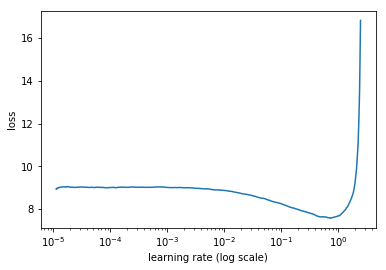

 90%|█████████ | 1027/1137 [00:30<00:03, 34.20it/s, loss=39.6]

In [18]:
learn.sched.plot()

In [19]:
lr = 0.1

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

 12%|█▏        | 133/1137 [00:03<00:26, 37.59it/s, loss=8.48]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[0.      5.1866  6.09432 0.15598]                             
[1.      2.92117 4.78743 0.32188]                             
[2.      1.81295 4.68513 0.37434]                             
[3.      2.15255 4.5826  0.3825 ]                             
[4.      1.43555 4.52311 0.42776]                             
[5.      1.04457 4.54775 0.45793]                             
[6.      0.80979 4.55302 0.46412]                              



In [21]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      1.05195 4.60091 0.46281]                             
[1.      1.16787 4.52292 0.47135]                             
[2.      0.80214 4.64183 0.47788]                              
[3.      1.09411 4.60913 0.4556 ]                             
[4.      0.84439 4.66268 0.48335]                              
[5.      0.63314 4.72449 0.49385]                              
[6.      0.55888 4.76035 0.49408]                              



### ResNext101

In [29]:
arch = resnext101

In [30]:
data = ImageClassifierData.from_paths(
    '/home/lex/kaggle-whale-categorization/data/aug-600x300', tfms=tfms_from_model(arch, size), test_name='test')

In [31]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 244/244 [01:02<00:00,  3.93it/s]            


In [32]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|████████▉ | 1019/1137 [00:30<00:03, 33.94it/s, loss=31.6]

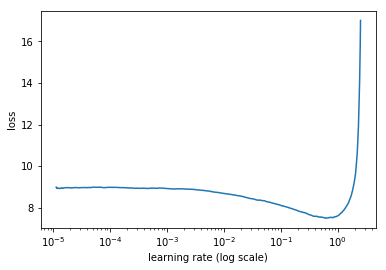

In [33]:
learn.sched.plot()

In [34]:
lr = 0.1

In [35]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

  6%|▋         | 73/1137 [00:01<00:25, 42.48it/s, loss=8.87]

Exception in thread Thread-67:
Traceback (most recent call last):
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lex/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[0.      5.10461 6.21683 0.13069]                             
[1.      2.75886 4.83756 0.29485]                             
[2.      1.52162 4.63293 0.35884]                             
[3.      1.86435 4.54514 0.37457]                             
[4.      1.23947 4.45383 0.41983]                             
[5.      0.75446 4.53127 0.4493 ]                              
[6.      0.53939 4.53882 0.4528 ]                              
[7.      1.15965 4.56618 0.42049]                             
[8.      0.89802 4.57852 0.43928]                              
[9.      0.73205 4.61442 0.46086]                              
[10.       0.54217  4.74394  0.47063]                          
[11.       0.43232  4.78978  0.47797]                          
[12.       0.31898  4.78018  0.48951]                          
[13.       0.26003  4.79183  0.4894 ]                          
[14.       0.24512  4.80931  0.49266]                          



In [36]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [37]:
accuracy(probs, y)

0.4938823529411765

In [49]:
log_test_preds, y = learn.TTA(is_test=True)

In [50]:
probs = np.mean(np.exp(log_test_preds), 0)

In [81]:
top_elems = np.argsort(probs, axis=1)[:,-5:]

In [87]:
probs[1][top_elems[1]][::-1]

array([0.17843, 0.06568, 0.05816, 0.05781, 0.04696], dtype=float32)

In [110]:
for count, filename in enumerate(data.test_ds.fnames):
    pred_classes = [data.classes[elem] for elem in top_elems[count]]
    print(filename + ' ' + str(pred_classes))
    break

test/d7531cbd.jpg ['w_92c7ace', 'w_9ceb05d', 'w_7419e4b', 'w_511c464', 'w_3a7d86d']
